 # Import and initialize all the elements that I will need later

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import jupyros as jr
import ipywidgets as widgets

import matplotlib
import rospy
import time
import math
import actionlib
import rt2_assignment1.msg

from rt2_assignment1.srv import Command
from rt2_assignment1.msg import ReachGoalResult
from matplotlib import animation, rc
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation
from ipywidgets import Button, Layout, ButtonStyle, GridBox, VBox, HBox
from IPython.display import display
from geometry_msgs.msg import Twist
from nav_msgs.msg import Odometry
%matplotlib widget

rospy.init_node('user_interface')
ui_client = rospy.ServiceProxy('/user_interface', Command)
client = actionlib.SimpleActionClient('go_to_point', rt2_assignment1.msg.ReachGoalAction)
pub=rospy.Publisher('/cmd_vel', Twist, queue_size=1)
time.sleep(10)

active=False
cancelled=0 
reached=0 
start_time=0
stop_time=0
data = list()

# Start or stop the robot using two buttons

In [17]:
start = widgets.Button(description="START",
                       layout=widgets.Layout(widht='auto',grid_area='b1'),
                       style=widgets.ButtonStyle(button_color='lightgreen'))

stop = widgets.Button(description="STOP",  
                      layout=widgets.Layout(width='auto', grid_area='b2'),
                      style=widgets.ButtonStyle(button_color='coral'))

def clicked_start(b): 
     global start_time
     global active
     global count
     ui_client("start")      
     active=True
     take=False
     start_time=time.time()
             
def clicked_stop(b):
     global cancelled
     global stop_time
     global active
     global data
     client.cancel_all_goals()
     twist_msg = Twist()
     twist_msg.linear.x = 0
     twist_msg.linear.y = 0
     twist_msg.angular.z = 0
     pub.publish(twist_msg)
     ui_client("stop")
     if active==True:
         cancelled = cancelled + 1 
         active=False
         stop_time=time.time()
         data.append(stop_time-start_time)
 
start.on_click(clicked_start)
stop.on_click(clicked_stop)

widgets.GridBox(children=[start,stop],
                layout=widgets.Layout(width='80%',grid_template_rows='auto auto auto',
                grid_template_columns='16% 16% 16% 16% 16% 16% ',
                grid_template_areas='''"b1.b2 . . . "''')
               )

GridBox(children=(Button(description='START', layout=Layout(grid_area='b1'), style=ButtonStyle(button_color='l…

In [19]:
def reached_goal_clb(msg):
  global reached
  global start_time,stop_time
  global data 
  stop_time=time.time()
  data.append(stop_time-start_time)
  start_time=time.time()
  reached = reached+1
  
jr.subscribe('/go_to_point/result',ReachGoalResult,reached_goal_clb)

Removing previous callback, only one redirection possible right now


# Set the linear and angular velocity using two sliders 

In [26]:
def stop():
     global cancelled
     global stop_time
     global active
     global data
     client.cancel_all_goals()
     twist_msg = Twist()
     twist_msg.linear.x = 0
     twist_msg.linear.y = 0
     twist_msg.angular.z = 0
     pub.publish(twist_msg)
     ui_client("stop")
     if active==True:
         cancelled = cancelled + 1 
         active=False
         stop_time=time.time()
         data.append(stop_time-start_time)
    
stop()

msg = Twist()
linear = widgets.FloatSlider(description='LINEAR Velocity' ,min=-1.0, max=1.0)
linear.style.handle_color = 'dodgerblue'
display(linear)
angular = widgets.FloatSlider(description='ANGULAR Velocity',min=-1.0, max=1.0)
angular.style.handle_color = 'dodgerblue'
display(angular)


def on_value_change(change):
    global msg
    msg.linear.x = change['new']
    pub.publish(msg)
    
def on_valueang_change(change):
    global msg
    msg.angular.z = change['new']
    pub.publish(msg)

linear.observe(on_value_change, names='value')
angular.observe(on_valueang_change, names='value')

FloatSlider(value=0.0, description='LINEAR Velocity', max=1.0, min=-1.0, style=SliderStyle(handle_color='dodge…

FloatSlider(value=0.0, description='ANGULAR Velocity', max=1.0, min=-1.0, style=SliderStyle(handle_color='dodg…

# Manual robot's control using 5 buttons

In [22]:
UP = widgets.Button(icon="fa-arrow-up", 
                    layout=Layout(width='auto', grid_area='UP'),
                    style=ButtonStyle(button_color='gainsboro'))

LEFT = widgets.Button(icon="fa-arrow-left",
                      layout=Layout(width='auto', grid_area='LEFT'),
                      style=ButtonStyle(button_color='gainsboro'))

DOWN = widgets.Button(icon="fa-arrow-down",
                      layout=Layout(width='auto', grid_area='DOWN'),
                      style=ButtonStyle(button_color='gainsboro'))

RIGHT = widgets.Button(icon="fa-arrow-right",
                       layout=Layout(width='auto', grid_area='RIGHT'),
                       style=ButtonStyle(button_color='gainsboro'))

STOP = widgets.Button(description="STOP",
                      layout=Layout(width='auto', grid_area='STOP'),
                      style=ButtonStyle(button_color='silver'))

def stop():
     global cancelled
     global stop_time
     global active
     global data
     client.cancel_all_goals()
     twist_msg = Twist()
     twist_msg.linear.x = 0
     twist_msg.linear.y = 0
     twist_msg.angular.z = 0
     pub.publish(twist_msg)
     ui_client("stop")
     if active==True:
         cancelled = cancelled + 1 
         active=False
         stop_time=time.time()
         data.append(stop_time-start_time)
        
def click_DOWN(f):
     stop()
     twist_msg = Twist()
     twist_msg.linear.x = -0.5
     twist_msg.linear.y=0
     twist_msg.angular.z = 0
     pub.publish(twist_msg)
        
def click_UP(f):
     stop()
     twist_msg = Twist()
     twist_msg.linear.x = 0.5
     twist_msg.linear.y=0
     twist_msg.angular.z = 0
     pub.publish(twist_msg)
        
def click_LEFT(f):
     stop()
     twist_msg = Twist()
     twist_msg.linear.x = 0
     twist_msg.linear.y=0
     twist_msg.angular.z = 0.5
     pub.publish(twist_msg)
        
def click_RIGHT(f):
     stop()
     twist_msg = Twist()
     twist_msg.linear.x = 0
     twist_msg.linear.y=0
     twist_msg.angular.z = -0.5
     pub.publish(twist_msg)       
    
def click_STOP(b):
     stop()
     twist_msg = Twist()
     twist_msg.linear.x = 0
     twist_msg.linear.y=0
     twist_msg.angular.z = 0
     pub.publish(twist_msg)
            
UP.on_click(click_UP)
LEFT.on_click(click_RIGHT)
DOWN.on_click(click_DOWN)
RIGHT.on_click(click_LEFT)
STOP.on_click(click_STOP)

widgets.GridBox(children=[UP, DOWN, LEFT, RIGHT ,STOP],
                layout=widgets.Layout(width='80%',grid_template_rows='auto auto auto',
                grid_template_columns='16% 16% 16% 16% 16% 16% ',
                grid_template_areas='''". .  . UP  . ."". . LEFT STOP RIGHT . "" . .  . DOWN . . "''')
               )

GridBox(children=(Button(icon='arrow-up', layout=Layout(grid_area='UP', width='auto'), style=ButtonStyle(butto…

# Linear velocity

In [6]:
t1 = time.time() 
time1 = list(range(0, 10))
odom_linear =list()
cmdvel_linear=list()

In [7]:
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return [line1,line2]

def clb_odom(msg):
    if len(time1)>10:
      time1.pop(0)    
    if len(odom_linear)>10:
      odom_linear.pop(0)
    x_ = np.float32(msg.twist.twist.linear.x)
    y_ = np.float32(time.time()-t1)
    odom_linear.append(y_)
    time1.append(x_)
    
jr.subscribe('/odom', Odometry, clb_odom)

In [8]:
def clb_cmdvel(msg):
    if len(cmdvel_linear)>10:
      cmdvel_linear.pop(0)
    y_ = np.float32(msg.linear.x)
    cmdvel_linear.append(y_)
    
jr.subscribe('/cmd_vel', Twist, clb_cmdvel)

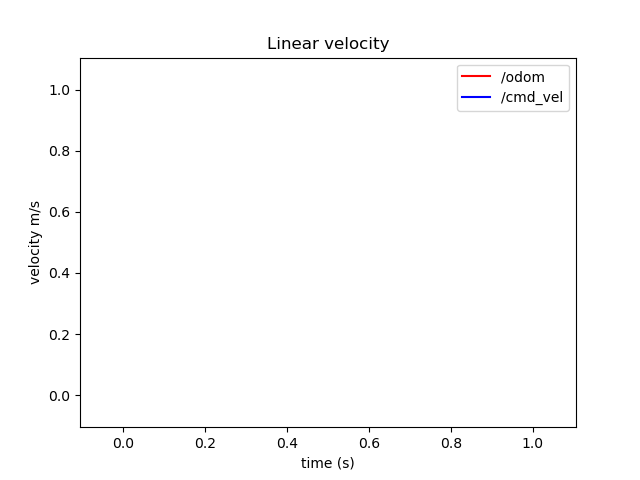

In [9]:
fig1,ax1 = plt.subplots()
ax1.set_xlabel('time (s)') 
ax1.set_ylabel('velocity m/s')
ax1.set_title("Linear velocity")
line1, = ax1.plot([], [], color ='r', label ='/odom')
line2, = ax1.plot([], [], color ='b', label ='/cmd_vel')
plt.legend(loc='upper right')

In [10]:
def animation_1(i):
    line1.set_data(time1, odom_linear)
    line2.set_data(time1, cmdvel_linear)
    ax1.axis([time1[0]-0.2,time1[9]+0.2,-0.5,0.5])    
    return [line1,line2]

animation_1 = animation.FuncAnimation(fig1, animation_1, init_func=init, frames=100, interval=20, blit=True)

# Angular velocity

In [11]:
t2 = time.time() 
time2 = list(range(0, 10))
odom_angular =list()
cmdvel_angular=list()

In [12]:
def init1():
    line3.set_data([], [])
    line4.set_data([], [])
    return [line3,line4]

def clb_odom1(msg):
    if len(time2)>10:
      time2.pop(0) 
    if len(odom_angular)>10:
      odom_angular.pop(0)
    iupsilon = np.float32(msg.twist.twist.angular.z)
    ix = np.float32(time.time()-t2)
    odom_angular.append(iupsilon)
    time2.append(ix)
    
jr.subscribe('/odom',Odometry, clb_odom1)

Removing previous callback, only one redirection possible right now


In [13]:
def clb_cmdvel1(msg):
    if len(cmdvel_angular)>10:
      cmdvel_angular.pop(0)
    iupsilon = np.float32(msg.angular.z)
    cmdvel_angular.append(iupsilon)
    
jr.subscribe('/cmd_vel', Twist, clb_cmdvel1)

Removing previous callback, only one redirection possible right now


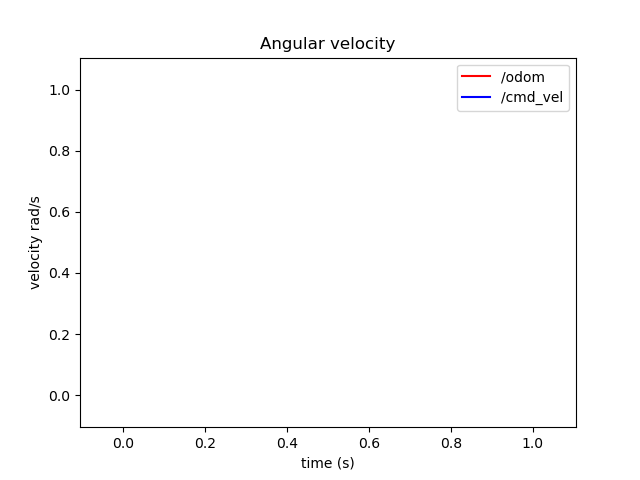

In [14]:
fig2, ax2 = plt.subplots()
line3, = ax2.plot([], [], color ='r', label ='/odom')
line4, = ax2.plot([], [], color ='b', label ='/cmd_vel')
ax2.set_xlabel('time (s)') 
ax2.set_ylabel('velocity rad/s')
ax2.set_title("Angular velocity")
plt.legend(loc='upper right')

In [15]:
def animation_2(i):
    line3.set_data(time2, odom_angular)
    line4.set_data(time2, cmdvel_angular)
    ax2.axis([time2[0]-0.2,time2[9]+0.2,-0.5,0.5])
    return [line3,line4]

animation_2 = animation.FuncAnimation(fig2, animate2, init_func=init1, frames=100, interval=20, blit=True)

NameError: name 'animate2' is not defined

# Barplot visualization of reached targets and cancelled targets


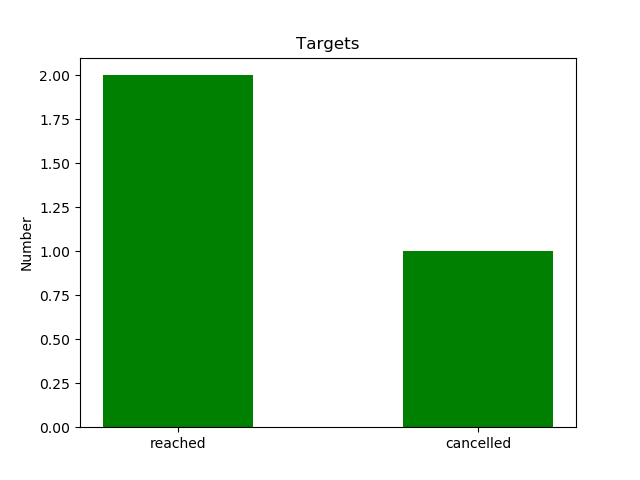

In [20]:
states = (reached,cancelled)
index = np.arange(2)
f1,axis2= plt.bar(index,states,width=0.5,color='g')
plt.ylabel('Number')
plt.title('Targets')
plt.xticks(index, ('reached', 'cancelled'))
plt.show()

# Histogram visualization

/tmp/ipykernel_7379/1901120746.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig2=plt.subplot(111)


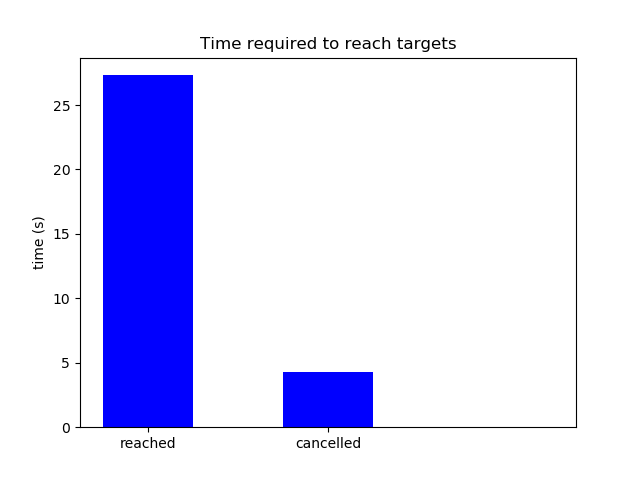

In [21]:
var2=list(range(0,len(data),1))
fig2=plt.subplot(111)
plt.bar(var2,data,width=0.5,color='b')
plt.ylabel('time (s)')
plt.title('Time required to reach targets')
plt.show()

# Show position

In [ ]:
x_data=list()
y_data=list()

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(( -5, 5))
ax.set_ylim((-5, 5))
ax.set_xlabel('x') 
ax.set_ylabel('y')
ax.set_title("Position")
line, = ax.plot([], [], 'ro')

In [ ]:
def init2():
    line.set_data([], [])
    return (line,)
    
def odom_callback(msg):
    if len(x_data)>50:
      x_data.pop(0)     
    if len(y_data)>50:
      y_data.pop(0)
    iupsilon = np.float32(msg.pose.pose.position.y)
    x_ = np.float32(msg.pose.pose.position.x)
    y_data.append(iupsilon)
    x_data.append(ix)
    
jr.subscribe('/odom', Odometry, odom_callback)

In [ ]:
def animation_3(i):
    line.set_data(x_data, y_data)
    return (line,)

animation_3 = animation.FuncAnimation(fig, animation_3, init_func=init2, frames=100, interval=20, blit=True)